In [2]:
# import librarys
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


Loading required package: carData



In [9]:
data <- read.csv('sample_data/cancer2.csv', header=TRUE)
head(data)

,type,gender,age,days
,<chr>,<int>,<int>,<int>
1,lung,2,61,124
2,lung,1,69,42
3,lung,2,73,25
4,lung,2,66,45
5,lung,1,63,312
6,lung,1,79,51


In [10]:
# make a factor
data$gender = factor(data$gender)

In [11]:
Days = data$days
Type = data$type
Gender = data$gender

In [13]:
# create ANOVA table
cancer.lm <- lm(Days~Type+Gender+Type*Gender)
anova(cancer.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Type,3,1198172.17,399390.72,3.4360249,0.0257588
Gender,1,73949.77,73949.77,0.6362022,0.4297991
Type:Gender,3,134995.92,44998.64,0.3871308,0.7628583
Residuals,40,4649450.81,116236.27,NA,NA


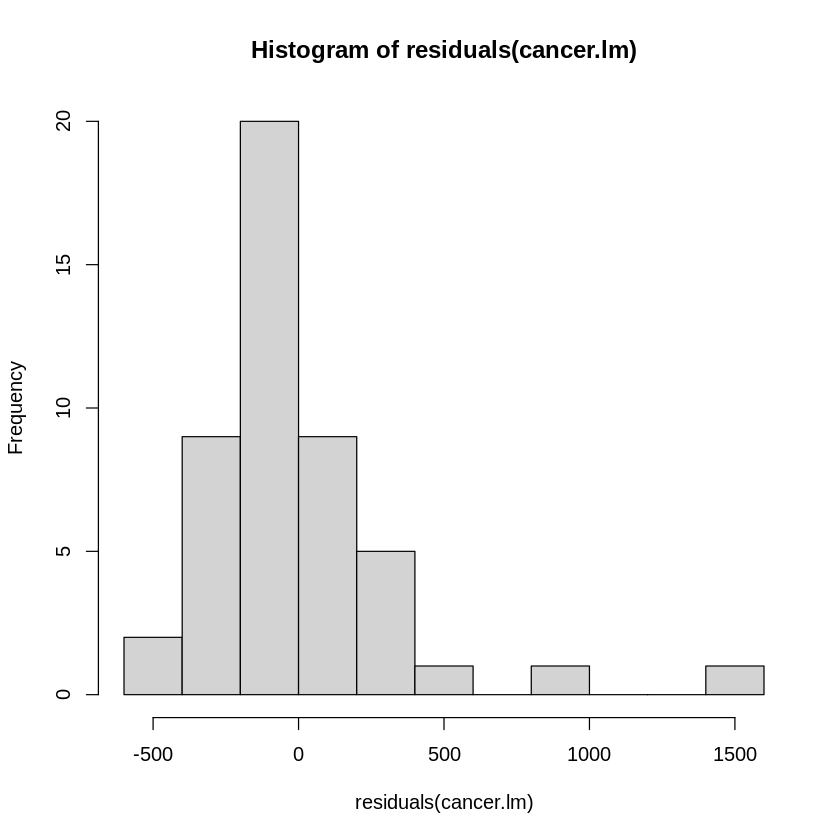

In [14]:
hist(residuals(cancer.lm))

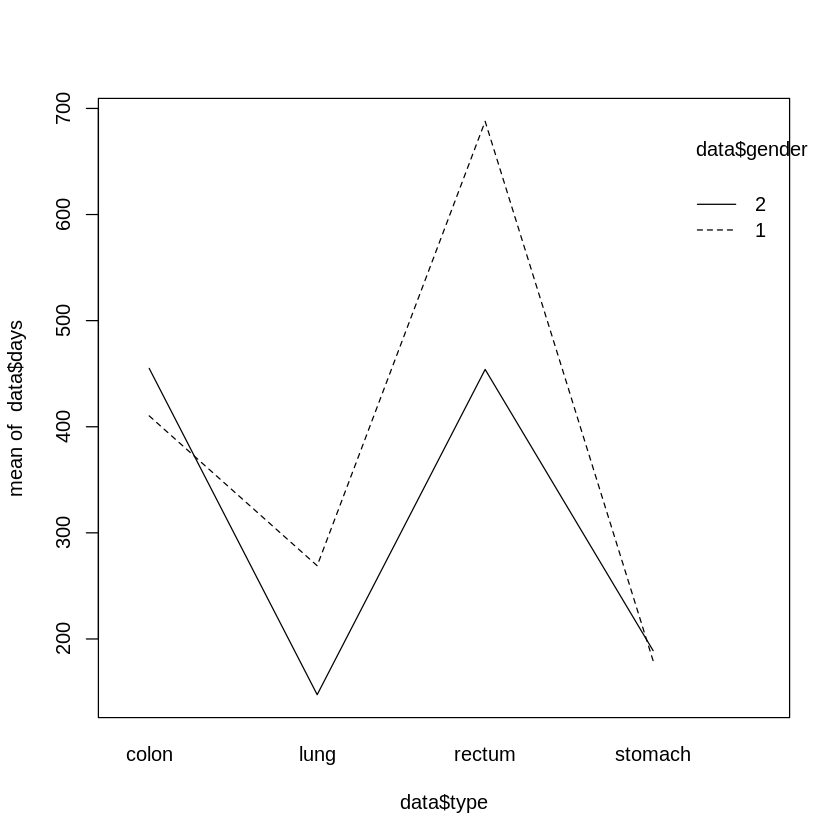

In [15]:
# create interaction plot
interaction.plot(data$type, data$gender, data$days )

In [16]:
# make a type III ANOVA
model = lm(Days~Type+Gender+Type*Gender, data=data,
contrasts=list(Type=contr.sum, Gender=contr.sum))
Anova(model, type='III')

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5102456.15,1,43.8972804,6.253351e-08
Type,1113542.93,3,3.1933318,3.366908e-02
Gender,59313.42,1,0.5102832,4.791645e-01
Type:Gender,134995.92,3,0.3871308,7.628583e-01
Residuals,4649450.81,40,NA,NA
